# ARIMA Models

**ARIMA**, or **Autoregressive Integrated Moving Average** is actually a combination of 3 models:
* **AR(p)** or **Autoregression** - The AR part of ARIMA indicates that the evolving variable of interest is regressed on its own lagged (i.e., prior) values.

![img](../meta/AR.png)

* **I(d)** or **Integration** - uses differencing of observations (subtracting an observation from an observation at the previous time step) in order to make the time series stationary
* **MA(q)** or **Moving Average** - A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. It indicates the regression error is actually a linear combination of error terms whose values occurred contemporaneously and at various times in the past. 

![img](../meta/MA.png)

**p** is the order (number of time lags) of the autoregressive model, **d** is the degree of differencing (the number of times the data have had past values subtracted), and **q** is the order of the moving-average model.

It is important to understand that ARIMA is not capable of perfectly predicting any time series data. Stock price data for example has so many outside factors that much of the information informing the price of the stock won’t be available with just the time stamped price information.

ARIMA performs very well when working with a time series where the data is directly related to the time stamp, such as the airline passenger data set. But it is important to keep in mind that an ARIMA model on that data wouldn’t be able to understand any outside factors, such as new developments in jet engines, if those effects weren’t already present in the current data. 

This is all to state that while ARIMA based models are extremely powerful tools, they are not magic, and a large part of using them effectively is understanding your data!

The AutoRegressive Integrated Moving Average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model. Both of those models (ARIMA and ARMA) are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). 

ARIMA models are applied in some cases where data show evidence of non-stationarity, where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity

**Stationary Data**:
* Mean needs to be constant
* Variance should not be a function of time
* Covariance should not be a function of time 

If you’ve determined your data is not stationary, you will then need to transform it to be stationary in order to evaluate it and what type of ARIMA terms you will use. One simple way to do this is through “differencing”. You can continue differencing until you reach stationarity. Each differencing step comes at the cost of losing a row of data!

For seasonal data, you can also difference by a season.

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from pylab import rcParams

rcParams['figure.figsize'] = 20, 6
rcParams['axes.grid'] = True

In [2]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima 

In [3]:
df1 = pd.read_csv('../meta/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df1.index.freq = 'D'

df2 = pd.read_csv('../meta/TradeInventories.csv',index_col='Date',parse_dates=True)
df2.index.freq='MS'

In [4]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string(), '\n')          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")
        
    return out

## ARMA

An **AR(1)** model follows the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \varepsilon_{t}$

while an **MA(1)** model follows the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = \mu + \theta_{1}\varepsilon_{t-1} + \varepsilon_{t}$

where $c$ is a constant, $\mu$ is the expectation of $y_{t}$ (often assumed to be zero), $\phi_1$ (phi-sub-one) is the AR lag coefficient, $\theta_1$ (theta-sub-one) is the MA lag coefficient, and $\varepsilon$ (epsilon) is white noise.

An **ARMA(1,1)** model therefore follows

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \theta_{1}\varepsilon_{t-1} + \varepsilon_{t}$

ARMA models can be used on stationary datasets.

For non-stationary datasets with a trend component, ARIMA models apply a differencing coefficient as well.


In general ARMA(p',q) is defined by:

![img](../meta/ARMA.png) <br> <center>or</center> ![img](../meta/ARMA2.png)

**Choosing p,d, and q terms:**

Our main priority here is to try to figure out the orders for the AR and MA components, and if we need to difference our data (the I component). Using **AutoCorrelation Plots** and **Partial AutoCorrelation Plots** we can choose p,d and q terms based on viewing the decay in the plot.

Depending on the dataset, it is quite common to only require AR or MA components, you may not need both!

* If the **autocorrelation** plot shows positive autocorrelation at the first lag, then it suggests to use the AR terms in relation to the lag
* If the **autocorrelation** plot shows negative autocorrelation at the first lag, then it suggests using MA terms.
* Typically a sharp drop after lag "k" suggests an AR-k model should be used. 
* If there is a gradual decline, it suggests an MA model.
* If the **PACF** displays a sharp cutoff while the ACF decays more slowly (i.e., has significant spikes at higher lags), we    say that the stationarized series displays an "AR signature," meaning that the autocorrelation pattern can be explained more    easily by adding AR terms than by adding MA terms.

Further Reading: <a href='https://people.duke.edu/~rnau/411arim3.htm'>Duke University Statistical Forecasting site</a>

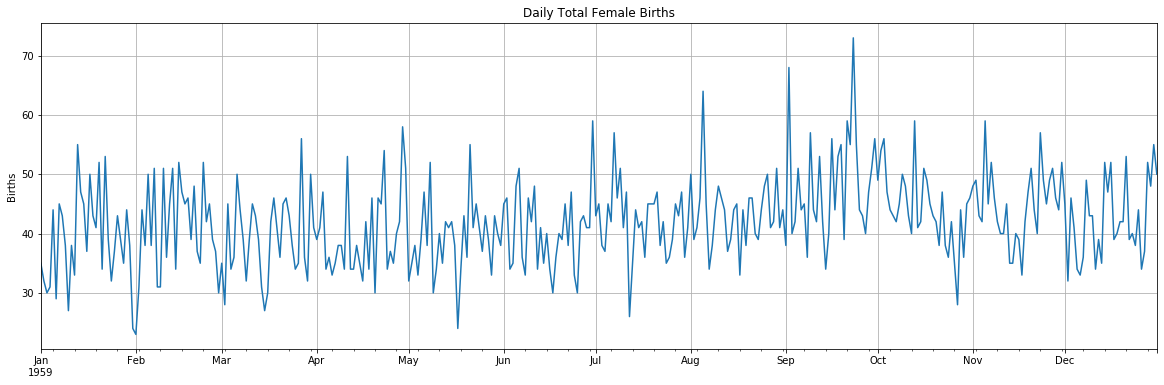

In [5]:
title = 'Daily Total Female Births'
ylabel='Births'
xlabel='' 

ax = df1['Births'].plot(title=title)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [6]:
adf_test(df1['Births']);

Augmented Dickey-Fuller Test: 
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089 

Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [7]:
train = df1.iloc[:304]
test = df1.iloc[304:]

start=len(train)
end=len(train)+len(test)-1

In [8]:
model = ARMA(train['Births'],order=(2,2)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                  304
Model:                     ARMA(2, 2)   Log Likelihood               -1026.873
Method:                       css-mle   S.D. of innovations              7.066
Date:                Sun, 01 Nov 2020   AIC                           2065.746
Time:                        21:16:24   BIC                           2088.048
Sample:                    01-01-1959   HQIC                          2074.667
                         - 10-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.3578      1.371     30.166      0.000      38.671      44.045
ar.L1.Births     0.0041      0.032      0.129      0.897      -0.058       0.066
ar.L2.Births     0.9412      0.029     32.135      0.000       0.884       0.999
ma.L1.Births     0.0994      0.055      1.821      0.069      -0.008       0.206
ma.L2.Births    -0.9005      0.054    -16.534      0.000      -1.007      -0.794
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0286           +0.0000j            1.0286            0.0000
AR.2           -1.0329           +0.0000j            1.0329            0.5000
MA.1           -1.0000           +0.0000j            1.0000            0.5000
MA.2            1.1104           +0.0000j            1.1104            0.0000
-----------------------------------------------------------------------------
"""

In [9]:
predictions = model.predict(start=start, end=end).rename('ARMA(2,2) Predictions')

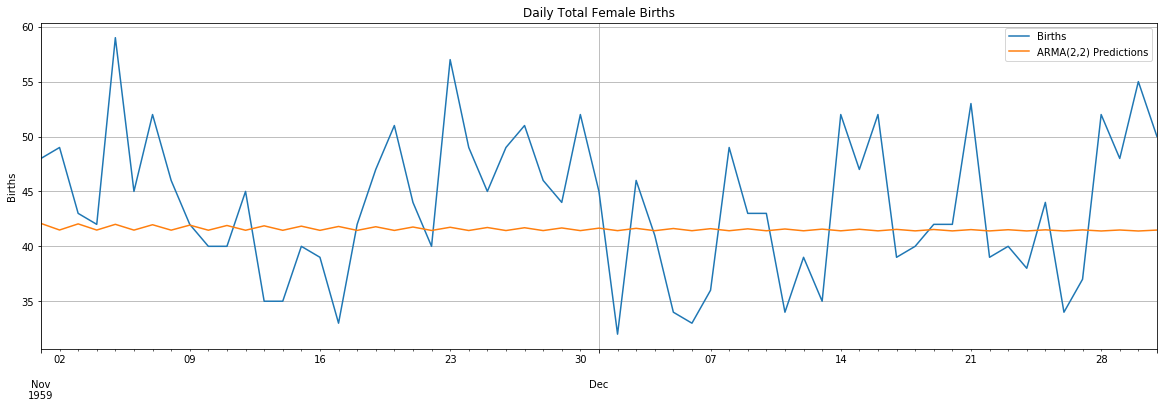

In [10]:
title = 'Daily Total Female Births'
ylabel='Births'
xlabel='' 

ax = test['Births'].plot(legend=True,title=title)
predictions.plot(legend=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

Since our starting dataset exhibited no trend or seasonal component, this prediction makes sense.

## ARIMA

ARIMA(p,q,d) is defined by:
    
![img](../meta/ARIMA.png)

In [11]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

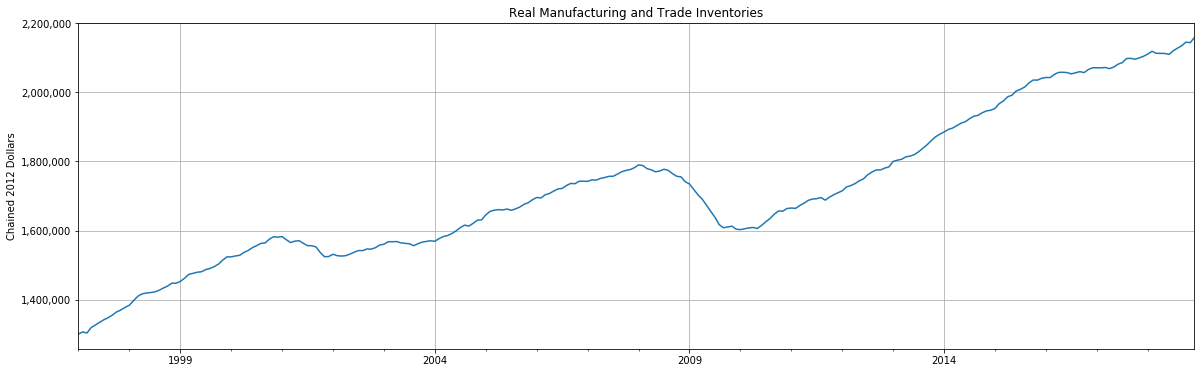

In [12]:
title = 'Real Manufacturing and Trade Inventories'
ylabel='Chained 2012 Dollars'
xlabel='' 

ax = df2['Inventories'].plot()
ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
ax.yaxis.set_major_formatter(formatter);

**Run an ETS Decomposition (optional)**

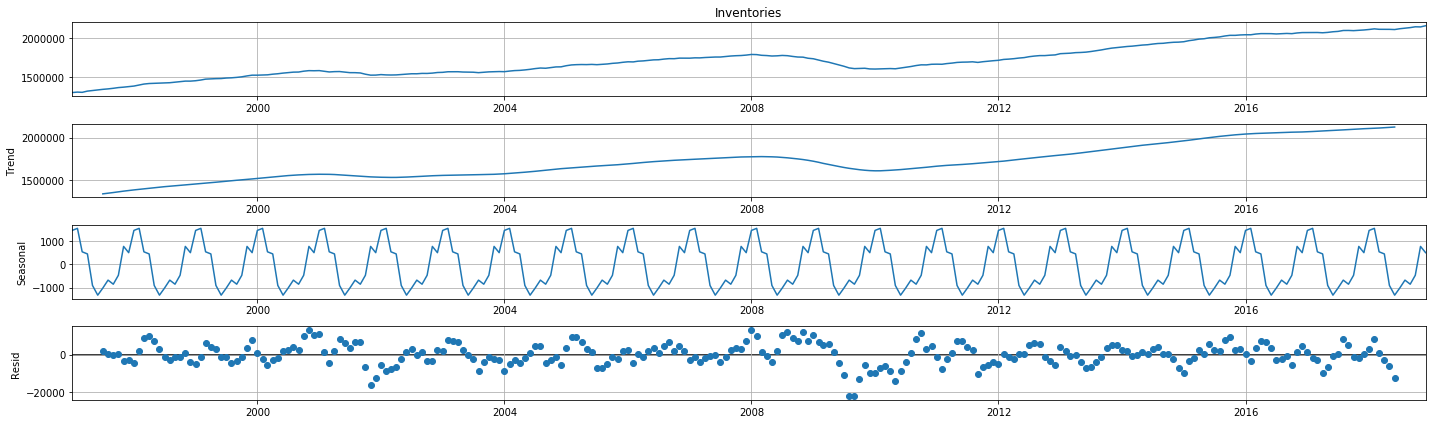

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df2['Inventories'], model='additive')
result.plot();

Here we see that the seasonal component does not contribute significantly to the behavior of the series.

In [14]:
from statsmodels.tsa.statespace.tools import diff
df2['d1'] = diff(df2['Inventories'],k_diff=1)

adf_test(df2['d1'],'Real Manufacturing and Trade Inventories');

Augmented Dickey-Fuller Test: Real Manufacturing and Trade Inventories
ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775 

Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


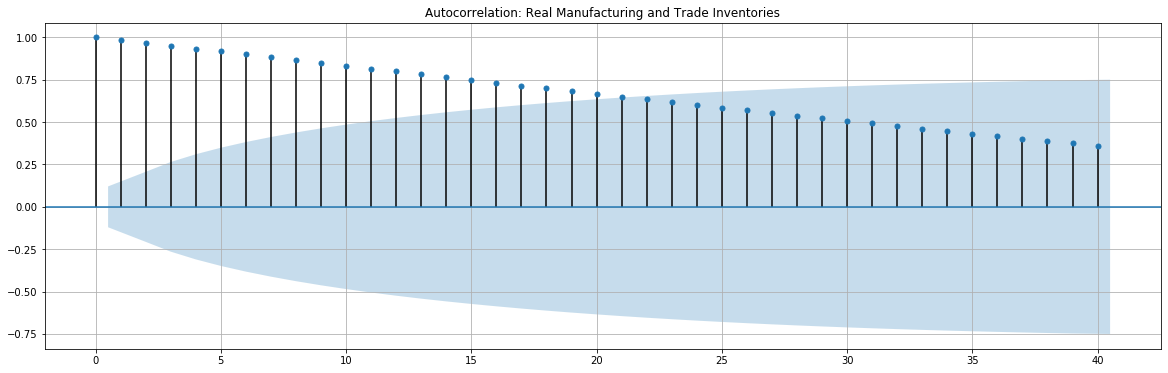

In [15]:
title = 'Autocorrelation: Real Manufacturing and Trade Inventories'
lags = 40
plot_acf(df2['Inventories'],title=title,lags=lags);

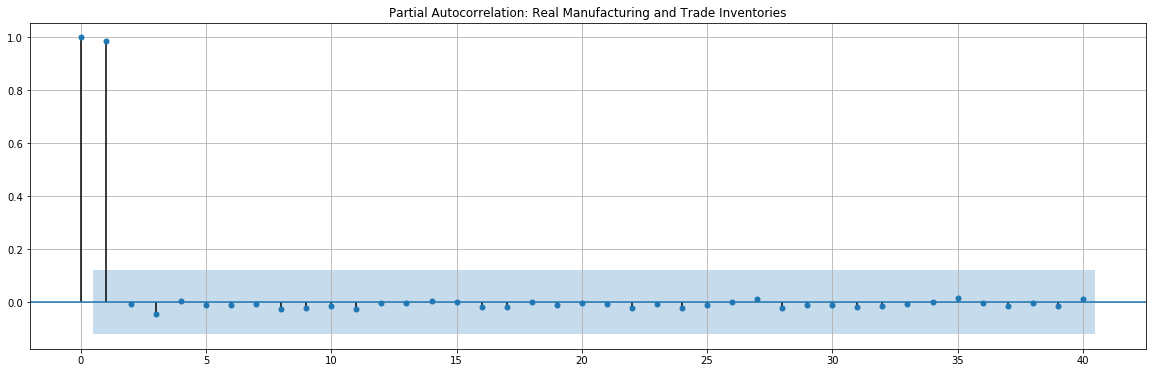

In [16]:
title = 'Partial Autocorrelation: Real Manufacturing and Trade Inventories'
lags = 40
plot_pacf(df2['Inventories'],title=title,lags=lags);

In [17]:
train = df2.iloc[:252]
test = df2.iloc[252:]

start=len(train)
end=len(train)+len(test)-1

In [24]:
model = ARIMA(train['Inventories'],order=(1, 1, 0)).fit()
predictions_110 = model.predict(start, end, typ='levels').rename('ARIMA(1,1,0) Predictions')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2497.396
Method:                       css-mle   S.D. of innovations           5064.527
Date:                Sun, 01 Nov 2020   AIC                           5000.793
Time:                        21:45:46   BIC                           5011.369
Sample:                    02-01-1997   HQIC                          5005.049
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3197.5697    764.690      4.182      0.000    1698.804    4696.335
ar.L1.D.Inventories     0.5843      0.051     11.467      0.000       0.484       0.684
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7115           +0.0000j            1.7115            0.0000
-----------------------------------------------------------------------------
"""

In [25]:
model = ARIMA(train['Inventories'],order=(1, 1, 1)).fit()
predictions_111 = model.predict(start, end, typ='levels').rename('ARIMA(1,1,1) Predictions')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.394
Method:                       css-mle   S.D. of innovations           4845.004
Date:                Sun, 01 Nov 2020   AIC                           4980.788
Time:                        21:45:54   BIC                           4994.889
Sample:                    02-01-1997   HQIC                          4986.463
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3244.6344   1345.033      2.412      0.016     608.418    5880.851
ar.L1.D.Inventories     0.9026      0.039     23.012      0.000       0.826       0.979
ma.L1.D.Inventories    -0.5581      0.079     -7.048      0.000      -0.713      -0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1079           +0.0000j            1.1079            0.0000
MA.1            1.7917           +0.0000j            1.7917            0.0000
-----------------------------------------------------------------------------
"""

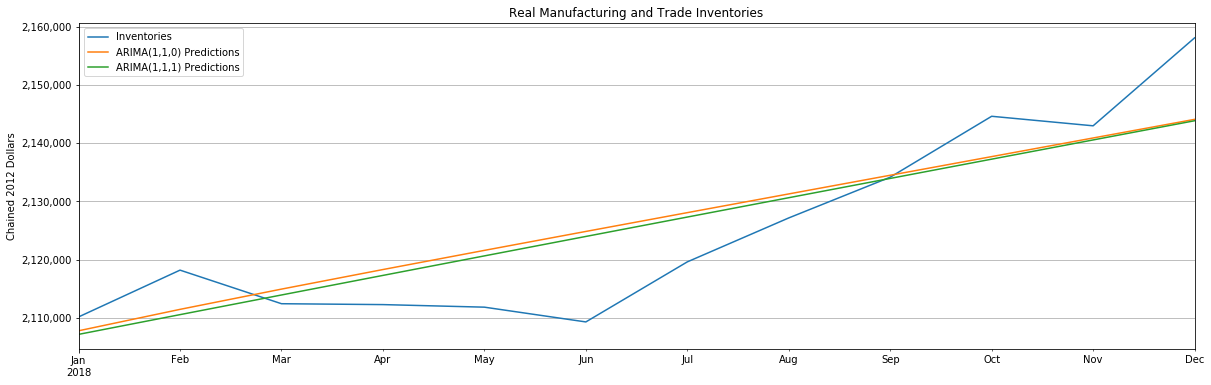

In [27]:
title = 'Real Manufacturing and Trade Inventories'
ylabel='Chained 2012 Dollars'
xlabel=''

ax = test['Inventories'].plot(legend=True,title=title)
predictions_110.plot(legend=True)
predictions_111.plot(legend=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [20]:
model = ARIMA(df2['Inventories'],order=(1,1,1)).fit()
fcast = model.predict(len(df2),len(df2)+11,typ='levels').rename('ARIMA(1,1,1) Forecast')

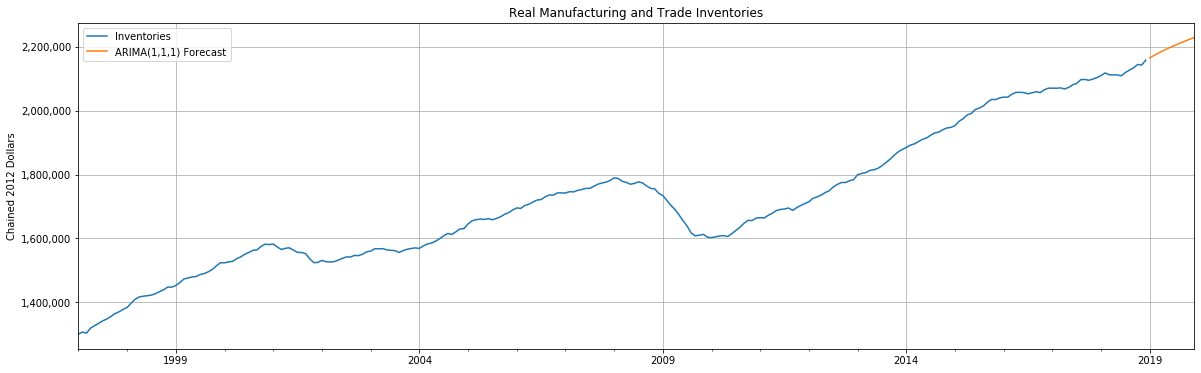

In [21]:
title = 'Real Manufacturing and Trade Inventories'
ylabel='Chained 2012 Dollars'
xlabel=''

ax = df2['Inventories'].plot(legend=True,title=title)
fcast.plot(legend=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);